In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('nrp 0-2.csv')

In [16]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         284 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        284 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    293 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Mengganti yang kosong supaya terbaca missing value

In [18]:
data = data.replace(' ', np.nan)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         284 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        284 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    293 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Memisahkan kolom

In [21]:
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
         'hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'native-country']

In [22]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

## Melihat jumlah kelas

In [23]:
print(data_Y['type'].unique())

[' <=50K' ' >50K']


## Mengganti missing value

In [24]:
data_int_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [25]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [35]:
data_cleaned = pd.concat([data_num_w_class, data_cat_clean], axis=1)

## Standardize

In [44]:
from sklearn.preprocessing import StandardScaler

In [55]:
data['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])
data.head()

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39,State-gov,0.0,Bachelors,1.038927,Never-married,Adm-clerical,Not-in-family,White,Male,3.246300,-0.245093,0.0,United-States,<=50K
1,50,Self-emp-not-inc,0.0,Bachelors,1.038927,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.308043,-0.245093,0.0,United-States,<=50K
2,38,Private,0.0,HS-grad,-0.452356,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.308043,-0.245093,0.0,United-States,<=50K
3,53,Private,0.0,11th,-1.197997,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.308043,-0.245093,0.0,United-States,<=50K
4,28,Private,0.0,Bachelors,1.038927,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.308043,-0.245093,0.0,Cuba,<=50K


## Deteksi outlier

In [62]:
data_num_w_type = pd.concat([data_int_clean, data_Y], axis=1)

In [57]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

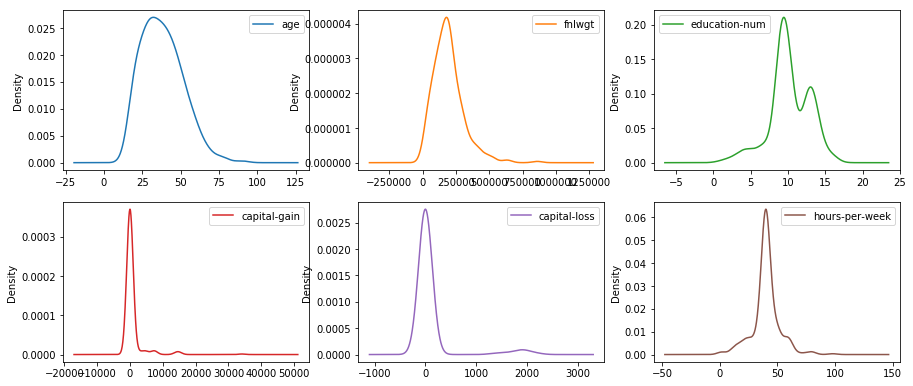

In [63]:
data_num_w_type.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

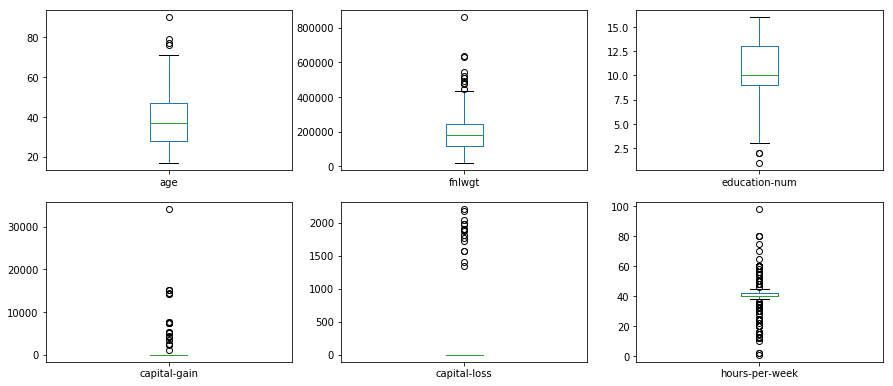

In [64]:
data_num_w_type.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [65]:
colors_palette = {" <=50K": "cyan",  " >50K": "black"}
colors = [colors_palette[c] for c in data_num_w_type['type']]

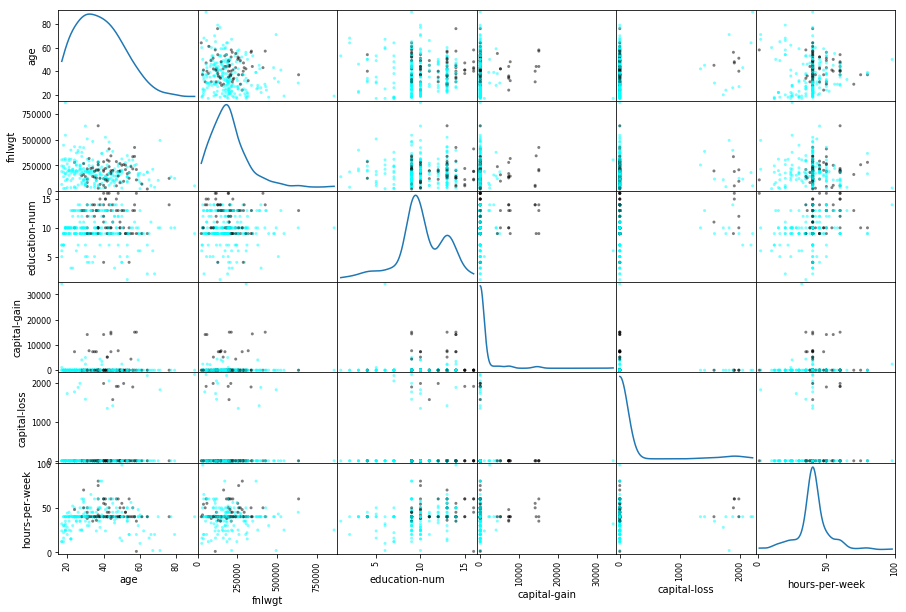

In [66]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_type, color=colors, diagonal='kde')
plt.show()

In [69]:
data_cleaned.to_csv('npr 0-2_cleaned.csv', index=0)